In [1]:
%matplotlib inline

import pandas
import seaborn

import pgdata

db = pgdata.connect()

# Get all salmon records that aren't in waterbodies
# This returns a record for every location/species combination
sql = """SELECT 
           fish_obsrvtn_distinct_id,
           edge_description,
           waterbody_type,
           vertex_from_elevation,
           vertex_to_elevation,
           vertex_length,
           vertex_slope,
           segment_from_elevation,
           segment_to_elevation,
           segment_length,
           segment_slope,
           species_code,
           species_name
         FROM temp.obs_spp_by_slope 
         WHERE (waterbody_type NOT IN ('X', 'L', 'W') OR waterbody_type IS NULL)
         AND species_code IN ('CH', 'CM', 'CO', 'PK', 'SK')
         AND edge_type in (1000, 1050, 1100, 1150, 2000)
         ORDER BY fish_obsrvtn_distinct_id, species_code
"""
all_spp = pandas.read_sql_query(sql, db.engine)

In [2]:
all_spp.head()

,fish_obsrvtn_distinct_id,edge_description,waterbody_type,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,species_code,species_name
0,15,"Single line blueline, main flow",None,405.85,405.85,14.90,0.00,405.851,409.000,865.07,0.36,SK,Sockeye Salmon
1,16,"Single line blueline, main flow",None,405.85,405.85,14.90,0.00,405.851,409.000,865.07,0.36,CH,Chinook Salmon
2,17,"Single line blueline, secondary flow",None,446.91,446.91,3.66,0.00,446.909,446.909,631.87,0.00,CH,Chinook Salmon
3,17,"Single line blueline, secondary flow",None,446.91,446.91,3.66,0.00,446.909,446.909,631.87,0.00,SK,Sockeye Salmon
4,22,"Single line blueline, main flow",None,427.00,427.35,17.08,2.05,427.000,452.000,339.11,7.37,CH,Chinook Salmon


In [3]:
all_spp.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,13571.000000,13571.000000,13571.000000,13571.000000,13571.000000,13571.000000,13571.000000,13571.00000,13571.000000
mean,21943.712180,154.127261,155.470695,13.675714,16.293924,154.127306,214.049661,1087.38682,5.236215
std,16988.510925,254.869540,254.466513,10.453587,49.243028,254.869530,277.752304,988.78299,8.129571
min,15.000000,1.000000,1.000000,0.920000,0.000000,1.000000,1.000000,1.54000,0.000000
25%,7301.500000,6.000000,8.315000,6.930000,0.000000,6.000000,29.000000,408.05500,1.040000
50%,18329.000000,31.500000,32.000000,11.920000,2.490000,31.500000,84.000000,811.16000,2.700000
75%,34209.500000,152.500000,153.070000,18.560000,12.360000,152.500000,292.000000,1444.89000,6.165000
max,63929.000000,1899.000000,1901.340000,209.310000,1345.190000,1899.000000,2157.000000,7928.88000,347.660000


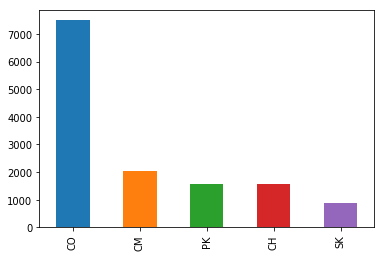

In [4]:
# how many unique locations per spp?
pandas.value_counts(all_spp['species_code']).plot.bar()

In [36]:
# create a data frame of unique locations and describe
#unique_pts = all_spp.drop_duplicates('fish_obsrvtn_distinct_id')
#unique_pts.head()
#unique_pts.describe()

,fish_obsrvtn_distinct_id,edge_description,waterbody_type,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,species_code,species_name
0,15,"Single line blueline, main flow",None,405.85,405.85,14.90,0.00,405.851,409.000,865.07,0.36,SK,Sockeye Salmon
1,16,"Single line blueline, main flow",None,405.85,405.85,14.90,0.00,405.851,409.000,865.07,0.36,CH,Chinook Salmon
2,17,"Single line blueline, secondary flow",None,446.91,446.91,3.66,0.00,446.909,446.909,631.87,0.00,CH,Chinook Salmon
4,22,"Single line blueline, main flow",None,427.00,427.35,17.08,2.05,427.000,452.000,339.11,7.37,CH,Chinook Salmon
6,28,"Single line blueline, main flow",None,861.00,861.00,19.27,0.00,861.000,880.500,1568.65,1.24,CH,Chinook Salmon


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1209dcc50>]],
      dtype=object)

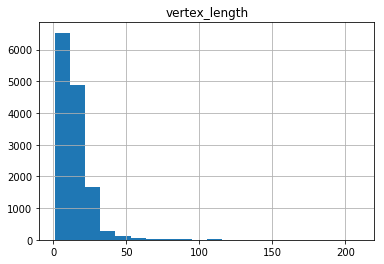

In [38]:
# plot histogram of vertex_lengths
all_spp.hist(column='vertex_length', bins=20)


In [39]:
pink_subset = all_spp[all_spp['species_code'] == 'PK']
pink_subset.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.00000,1579.000000,1579.000000
mean,13452.518683,61.676916,63.436219,13.855415,19.888068,61.676932,109.99112,905.909018,4.944756
std,13296.878307,124.608028,124.090348,10.952528,48.474296,124.608040,163.50367,840.162096,6.608366
min,446.000000,1.000000,1.000000,0.950000,0.000000,1.000000,1.00000,16.770000,0.000000
25%,3567.000000,1.000000,7.000000,7.065000,0.000000,1.000000,23.00000,354.220000,1.320000
50%,9664.000000,18.000000,18.760000,11.660000,4.220000,18.000000,48.56100,671.560000,2.850000
75%,18052.000000,54.000000,54.075000,18.385000,17.520000,54.000000,117.00000,1176.810000,6.115000
max,62838.000000,1324.000000,1325.100000,167.590000,573.580000,1324.000000,1588.00000,7928.880000,64.810000


In [40]:
# try removing all records where vertex_length < 2m
pink_subset[pink_subset['vertex_length'] >= 2].describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,13507.404731,62.008771,63.789560,14.326938,17.231465,62.008790,110.798935,905.546932,4.983719
std,13424.770701,124.632631,124.110568,10.875987,37.592610,124.632642,164.523643,843.191155,6.652197
min,446.000000,1.000000,1.000000,2.060000,0.000000,1.000000,1.000000,16.770000,0.000000
25%,3445.000000,1.000000,7.000000,7.362500,0.000000,1.000000,23.000000,351.170000,1.320000
50%,9700.500000,18.000000,18.735000,12.075000,4.250000,18.000000,49.000000,673.495000,2.875000
75%,18057.750000,54.000000,54.150000,18.687500,16.745000,54.000000,119.750000,1177.820000,6.160000
max,62838.000000,1324.000000,1325.100000,167.590000,443.100000,1324.000000,1588.000000,7928.880000,64.810000


In [41]:
pink_subset[pink_subset['vertex_slope'] <= 100].describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.00000,1507.000000,1507.000000
mean,13499.165893,64.515985,66.027750,14.309177,11.443258,64.516007,112.46913,910.468115,4.857432
std,13427.102645,126.848965,126.431951,10.989843,18.340653,126.848975,165.43985,849.636244,6.449080
min,446.000000,1.000000,1.000000,0.950000,0.000000,1.000000,1.00000,16.770000,0.000000
25%,3593.500000,3.000000,7.015000,7.515000,0.000000,3.000000,24.00000,354.220000,1.260000
50%,9687.000000,20.000000,20.240000,12.110000,3.600000,20.000000,50.00000,671.110000,2.750000
75%,17820.500000,55.430000,55.765000,18.800000,13.620000,55.428000,123.00000,1181.510000,6.065000
max,62838.000000,1324.000000,1325.100000,167.590000,98.840000,1324.000000,1588.00000,7928.880000,54.100000


In [42]:
# try removing all records where vertex_length < 2m
unique_subset1 = all_spp[all_spp['vertex_length'] >= 2]
unique_subset1.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,12974.000000,12974.000000,12974.000000,12974.000000,12974.000000,12974.000000,12974.000000,12974.000000,12974.000000
mean,21876.476723,152.632944,153.992201,14.247281,13.378754,152.632992,212.703255,1087.597148,5.230187
std,16932.347639,254.077894,253.681859,10.338043,31.567016,254.077887,277.250209,994.738244,7.602914
min,15.000000,1.000000,1.000000,2.020000,0.000000,1.000000,1.000000,11.330000,0.000000
25%,7265.000000,6.000000,8.252500,7.230000,0.000000,6.000000,29.000000,404.247500,1.040000
50%,18319.000000,31.000000,31.690000,12.325000,2.520000,31.000000,84.000000,808.330000,2.710000
75%,34236.000000,149.500000,149.822500,18.990000,11.915000,149.500000,287.000000,1443.647500,6.190000
max,63922.000000,1899.000000,1901.340000,209.310000,476.010000,1899.000000,2157.000000,7928.880000,97.080000


In [43]:
# from that, retain only records where vertex slope <= 100
unique_subset2 = unique_subset1[unique_subset1['vertex_slope'] <= 100]
unique_subset2.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,22021.594095,155.523896,156.737824,14.473766,9.624982,155.523948,215.418518,1092.570026,5.135622
std,17027.191744,255.459081,255.124686,10.351231,16.926429,255.459073,278.568362,994.022626,7.448066
min,15.000000,1.000000,1.000000,2.020000,0.000000,1.000000,1.000000,12.230000,0.000000
25%,7271.500000,7.000000,8.560000,7.590000,0.000000,7.000000,29.000000,407.245000,1.010000
50%,18364.000000,33.000000,33.000000,12.695000,2.215000,33.000000,85.000000,812.480000,2.630000
75%,34790.000000,157.000000,157.587500,19.050000,10.730000,157.000000,295.000000,1455.270000,6.100000
max,63922.000000,1899.000000,1901.340000,209.310000,99.650000,1899.000000,2157.000000,7928.880000,72.870000


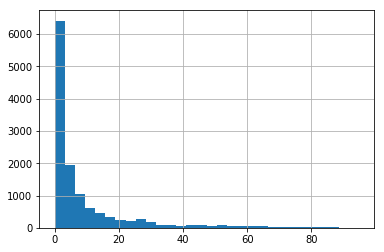

In [44]:
# for remaining records, check distribution of the difference between the two values
diff = unique_subset2['vertex_slope'] - unique_subset2['segment_slope']
diff = diff.abs()
diff.hist(bins=30)

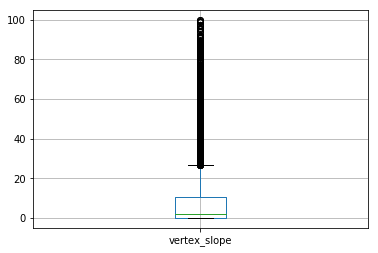

In [45]:
# try a box plot for all species
unique_subset2.boxplot(column=['vertex_slope'])

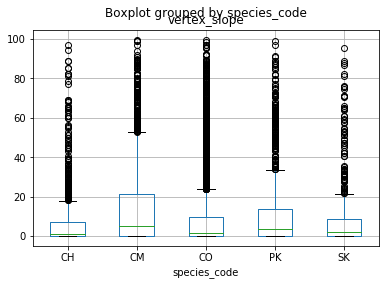

In [46]:
# try boxplot of all spp
unique_subset2.boxplot(column='vertex_slope', by='species_code')

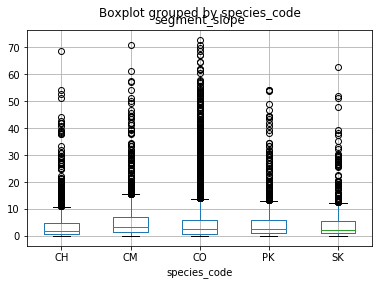

In [47]:
# try the same using the slope of the entire segment
unique_subset2.boxplot(column='segment_slope', by='species_code')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


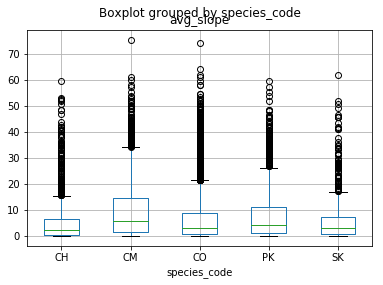

In [48]:
# try averaging the slope values
unique_subset2['avg_slope'] = (unique_subset2['vertex_slope'] + unique_subset2['segment_slope']) / 2
unique_subset2.boxplot(column='avg_slope', by='species_code')



In [49]:
# 90th percentile, all species
print(unique_subset2.vertex_slope.quantile(0.9))
print(unique_subset2.segment_slope.quantile(0.9))

29.70600000000002
12.17


In [50]:
# 90th percentile by species
for species in ['CH', 'CM', 'CO', 'PK', 'SK']:
    print(species + ' ' + str(unique_subset2[unique_subset2['species_code'] == species].vertex_slope.quantile(0.9)))


CH 18.652000000000008
CM 48.666999999999994
CO 27.58
PK 33.94200000000004
SK 20.901999999999997


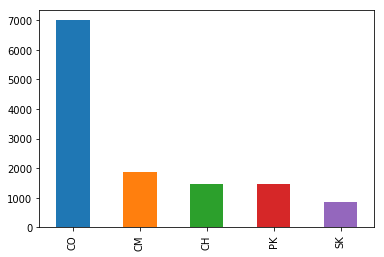

In [51]:
pandas.value_counts(unique_subset2['species_code']).plot.bar()

In [53]:
# remove records that are coming right out of the ocean
unique_subset3 = unique_subset2[unique_subset2['vertex_from_elevation'] >= 2]
unique_subset3.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,avg_slope
count,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000,10574.000000
mean,23260.512862,186.124366,186.701201,13.935772,5.080707,186.124427,245.224851,1098.820069,4.943672,5.012190
std,17689.083243,269.292939,269.343593,10.221350,10.268302,269.292923,290.711627,971.917465,7.550733,7.060047
min,15.000000,2.000000,2.000000,2.020000,0.000000,2.000000,2.000000,14.940000,0.000000,0.000000
25%,7971.500000,16.000000,16.030000,7.180000,0.000000,16.000000,40.000000,423.535000,0.850000,0.630000
50%,19334.500000,51.130000,52.100000,12.080000,0.470000,51.128500,107.000000,837.600000,2.390000,2.525000
75%,39618.250000,241.875000,242.180000,18.550000,5.910000,241.875000,363.000000,1481.860000,5.660000,6.345000
max,63922.000000,1899.000000,1901.340000,209.310000,92.060000,1899.000000,2157.000000,7928.880000,72.870000,74.035000


In [65]:
unique_subset3 = unique_subset2[unique_subset2['vertex_from_elevation'] <= 1]
unique_subset3.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,avg_slope
count,2085.000000,2085.0,2085.000000,2085.000000,2085.000000,2085.0,2085.000000,2085.000000,2085.000000,2085.000000
mean,15715.060911,1.0,5.449928,17.154839,32.710600,1.0,65.177799,1058.886767,6.130293,19.420446
std,11246.863825,0.0,2.847254,10.573074,23.835956,0.0,124.952541,1094.335405,6.829806,12.844386
min,615.000000,1.0,1.000000,2.060000,0.000000,1.0,1.000000,12.230000,0.000000,0.000000
25%,4935.000000,1.0,3.350000,9.780000,13.610000,1.0,11.000000,345.490000,2.110000,9.735000
50%,13256.000000,1.0,5.240000,15.200000,26.460000,1.0,26.000000,689.140000,4.130000,15.830000
75%,24377.000000,1.0,6.860000,21.520000,50.470000,1.0,56.000000,1365.770000,7.990000,29.020000
max,40752.000000,1.0,25.000000,105.890000,99.650000,1.0,1131.000000,6653.010000,71.050000,75.330000


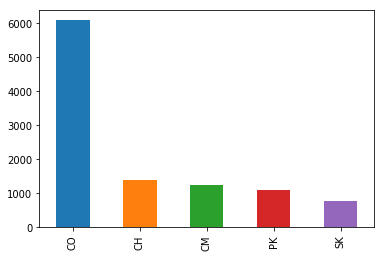

In [54]:
pandas.value_counts(unique_subset3['species_code']).plot.bar()

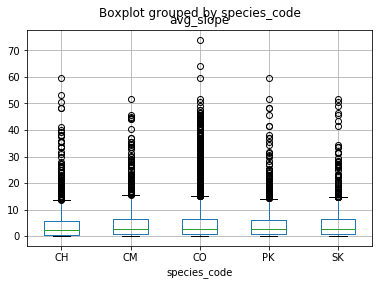

In [57]:
unique_subset3.boxplot(column='avg_slope', by='species_code')

In [58]:
print(unique_subset3.vertex_slope.quantile(0.9))
print(unique_subset3.segment_slope.quantile(0.9))

13.67800000000003
12.157000000000009


In [59]:
# 90th percentile by species
for species in ['CH', 'CM', 'CO', 'PK', 'SK']:
    print(species + ' ' + str(unique_subset3[unique_subset3['species_code'] == species].vertex_slope.quantile(0.9)))


CH 14.262999999999995
CM 12.754000000000001
CO 14.04
PK 12.912
SK 13.668000000000005
